### Evaulating if the feature is useful

In [105]:
import pandas as pd
from scipy.stats import mannwhitneyu
from utils_python import Match_features_with_BCR
import numpy as np
# feature_path = r"./Data\Feature\Nerve\Chunk35_features_072325.csv"
feature_path =   r"./Data\Feature\Nerve/Annulus2040_chunk256_features_080625.csv"
BCR_path =  r"./UPENN_CLINICAL_2025.csv"
# p_value_path = r"Z:\Sarah\SegMask_features\Data\Feature\Nerve\Pvalue-Annulus30-60_78features2D_average_011625.csv"

feature = pd.read_csv(feature_path)
BCR = pd.read_csv(BCR_path)

In [106]:
#Step 1: Match features with BCR
features_BCR = Match_features_with_BCR(feature, BCR, 
                feature_patientID_col = "sample_name",
                BCR_patientID_col = "sample_name",
                BCR_2match_col="5yBCR")
BCRin5y_col = "5yBCR"
features_BCR = features_BCR.dropna(subset=[BCRin5y_col])
# features_BCR = features_BCR[features_BCR['N_peri'] != 0]
features_BCR = features_BCR[~(features_BCR.iloc[:, 1:2] == 0).all(axis=1)]

# features_BCR = features_BCR.fillna(0)
# features_BCR = features_BCR.replace([np.inf, -np.inf], 1e6)

# Step 2: Separate BCR0 and BCR1 population
BCR_0 = features_BCR[features_BCR[BCRin5y_col] == 0]
BCR_1 = features_BCR[features_BCR[BCRin5y_col] == 1]
print("BCR0 population:", len(BCR_0), "\nBCR1 population:", len(BCR_1))

# Step 3: Perform Mann-Whitney U test for each feature
results = []
useless_col = ["sample_name", "5yBCR"]
features_col = [col for col in features_BCR.columns if col not in useless_col]

for col in features_col:
    if pd.api.types.is_numeric_dtype(features_BCR[col]):
        _, p_value = mannwhitneyu(
            BCR_0[col].dropna(), BCR_1[col].dropna(), method="exact"
        )
        results.append({"Feature": col, "P-value": p_value})

# Step 4: Save results into a new dataframe and print
p_values_df = pd.DataFrame(results)
# p_values_df.to_csv(p_value_path)
print(p_values_df.sort_values(by="P-value"))



BCR0 population: 45 
BCR1 population: 36
                    Feature   P-value
27        perc_invasion_max  0.049777
23        perc_gradient_min  0.049777
31        perc_invasion_std  0.136205
11          perc_ca_dis_std  0.195762
25     perc_gradient_median  0.222322
30     perc_invasion_median  0.251310
20          invasion_median  0.305147
19            invasion_mean  0.305147
29       perc_invasion_mean  0.316751
15          gradient_median  0.340799
13             gradient_min  0.378954
17             invasion_max  0.378954
21             invasion_std  0.462589
26        perc_gradient_std  0.477445
16             gradient_std  0.507907
0   top_chunk_perc_gradient  0.555403
1   top_chunk_perc_invasion  0.555403
24       perc_gradient_mean  0.621852
8           perc_ca_dis_min  0.638977
6           perc_ca_adj_std  0.656293
9          perc_ca_dis_mean  0.691465
3           perc_ca_adj_min  0.727300
14            gradient_mean  0.782144
7           perc_ca_dis_max  0.800678
28       

In [41]:
p_values_df

,Feature,P-value
0,total_cancer_volume_adj,0.590629
1,total_cancer_volume_dis,0.635114
2,total_cancer_surface_adj,0.620131
3,total_cancer_surface_dis,0.696472
4,total_annulus_volume_adj,0.824837
...,...,...
73,mean_percentage_surface_invasion,0.974780
74,med_percentage_surface_invasion,0.841290
75,min_percentage_surface_invasion,0.712141
76,max_percentage_surface_invasion,0.590629


In [17]:
feature_BCR

,sample_name,total_cancer_volume_adj,total_cancer_volume_dis,total_cancer_surface_adj,total_cancer_surface_dis,total_annulus_volume_adj,total_annulus_volume_dis,total_annulus_surface_adj,total_annulus_surface_dis,total_cancer_percentage_adj,...,med_percentage_surface_gradient,min_percentage_surface_gradient,max_percentage_surface_gradient,sd_percentage_surface_gradient,mean_percentage_surface_invasion,med_percentage_surface_invasion,min_percentage_surface_invasion,max_percentage_surface_invasion,sd_percentage_surface_invasion,5yBCR
0,AFM004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,AFM008,174692.0,100826.0,19085.0,6612.0,1479425.0,1750404.0,211889.0,250400.0,0.118081,...,0.343056,0.343056,0.343056,0.000000,2.914973,2.914973,2.914973,2.914973,0.000000,0.0
3,EAM003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,EAM004,4238964.0,4452868.0,604088.0,594060.0,4774413.0,5384224.0,692092.0,759269.0,0.887850,...,0.957959,0.731371,1.048229,0.131987,1.106518,1.052393,0.953990,1.367295,0.169584,1.0
6,EAM006,6624390.0,8672134.0,1049836.0,1268020.0,11210317.0,12636803.0,1627183.0,1767338.0,0.590919,...,1.096680,0.840602,25.198121,7.235761,0.849182,0.912117,0.039685,1.189623,0.294232,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,AFM014,322240.0,620213.0,63435.0,101561.0,667539.0,858133.0,101937.0,129523.0,0.482728,...,1.260036,1.260036,1.260036,0.000000,0.793628,0.793628,0.793628,0.793628,0.000000,0.0
103,EAM002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
105,AFM023,436258.0,518785.0,64525.0,70670.0,532463.0,843334.0,88285.0,140609.0,0.819321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
106,AFM024,415614.0,844641.0,80632.0,156110.0,2050944.0,3345453.0,359004.0,530597.0,0.202645,...,2.335275,1.045399,3.625151,1.289876,0.616212,0.616212,0.275851,0.956573,0.340361,0.0


Plot each feature's boxplot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from utils_python import plot_bpvpsp


for feature in features_col:
    Data = [BCR_0[feature].dropna().to_list(), BCR_1[feature].dropna().to_list()]

    title = "Boxplot, scatter plot, violin plot and P-value"
    ylabel = feature
    xlabel = ["BCR0", "BCR1"]
    color = ["#1f77b4", "#d62728"]
    ylim = [0, np.max([np.max(Data[i]) for i in range(len(Data))])*1.1]

    plot_bpvpsp(Data, title, ylabel, xlabel, ylim, color)


Plot cancer vs non cancer region

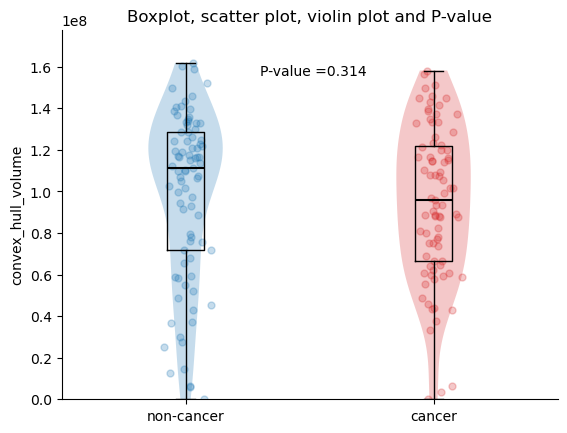

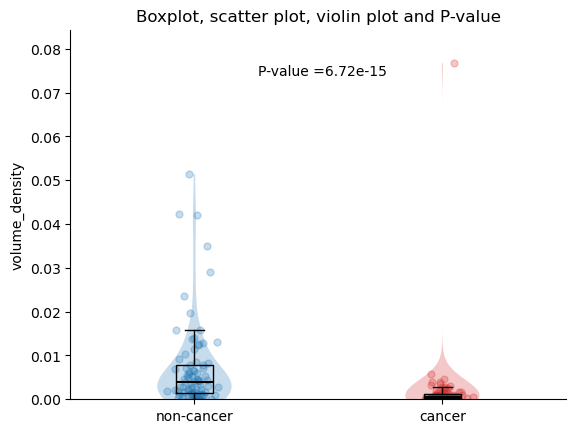

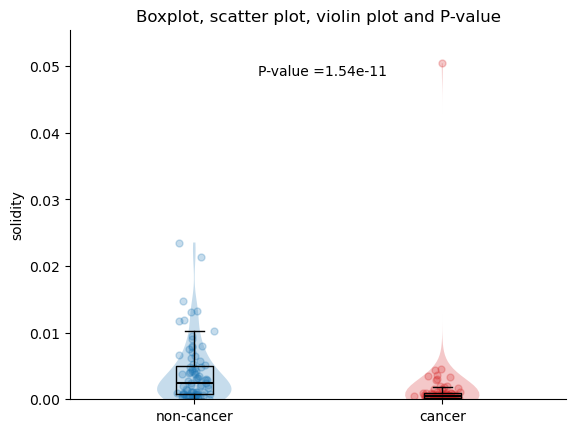

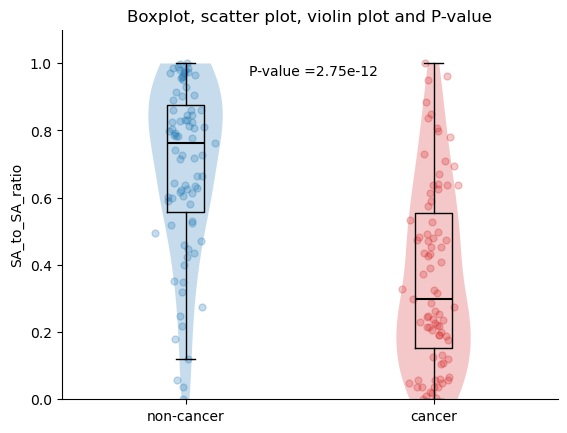

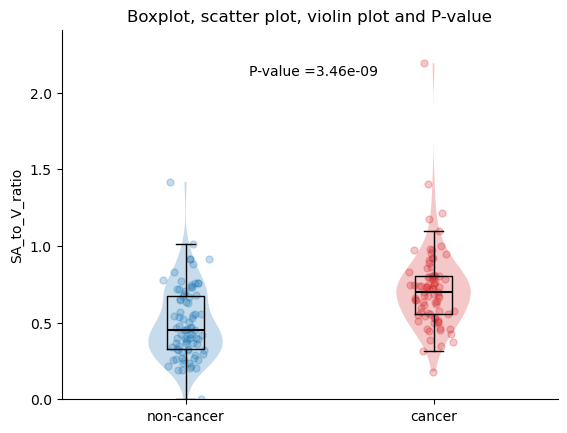

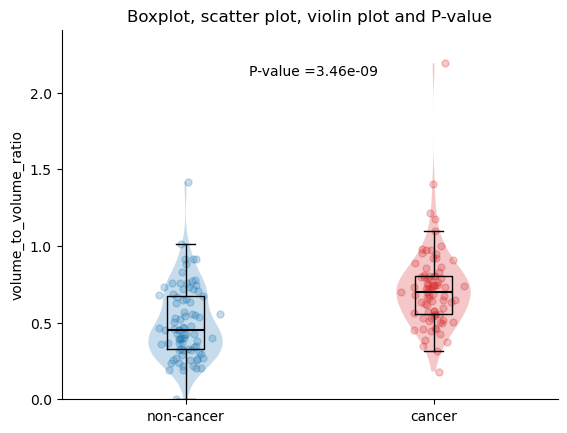

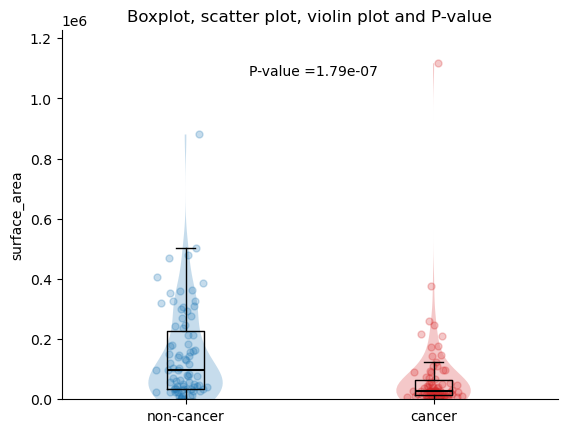

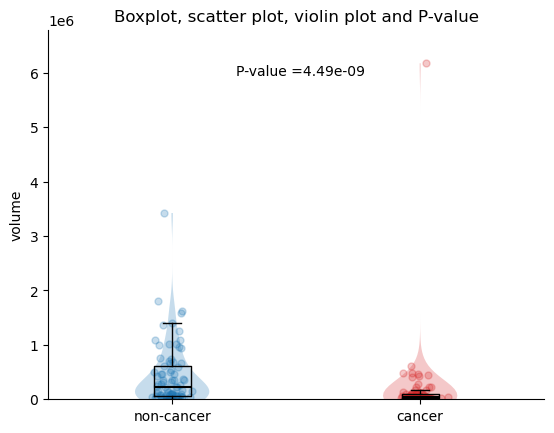

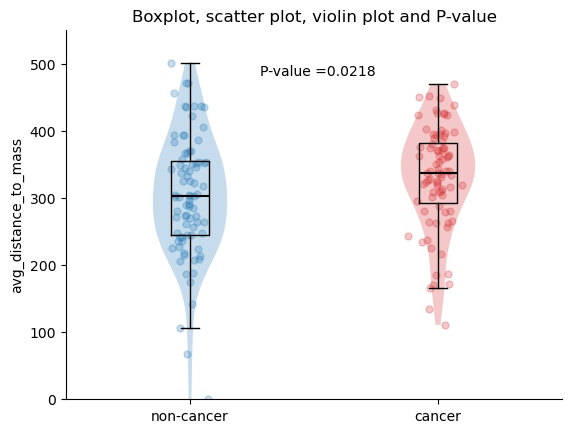

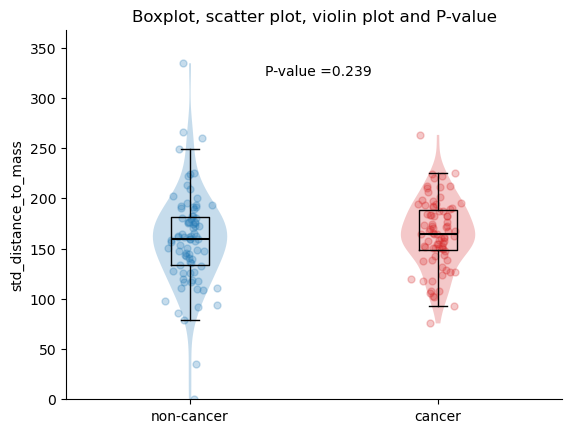

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from utils_python import plot_bpvpsp

features_col
filtered = [f for f in features_col if not f.startswith('Total_')]

# Step 2: Separate cancer and noncancer features
cancer_features = {f.split('cancer_')[1] for f in filtered if f.startswith('cancer_')}

prefix1 = "noncancer"
prefix2 = "cancer"
for feature in cancer_features:
    Data = [feature_BCR[f"{prefix1}_{feature}"].dropna().to_list(), feature_BCR[f"{prefix2}_{feature}"].dropna().to_list()]

    title = "Boxplot, scatter plot, violin plot and P-value"
    ylabel = feature
    xlabel = ["non-cancer", "cancer"]
    color = ["#1f77b4", "#d62728"]
    ylim = [0, np.max([np.max(Data[i]) for i in range(len(Data))])*1.1]

    plot_bpvpsp(Data, title, ylabel, xlabel, ylim, color)

In [21]:
Data = [BCR_0[feature].dropna().to_list(), BCR_1[feature].dropna().to_list()]

In [41]:
np.max([np.max(Data[i]) for i in range(len(Data))])

7268843

In [39]:
[i for i in range(len(Data))]

[0, 1]

Filtering features

In [73]:
To_be_filtered = [
"mean_surface_invasion",
"mean_percentage_surface_invasion",
"med_gradient",
"mean_invasion",
"mean_percentage_invasion",
"mean_gradient",
"min_percentage_surface_gradient",
"max_percentage_surface_invasion",
"mean_percentage_gradient",
"mean_percentage_surface_gradient",
"min_invasion",
"min_percentage_invasion",
"med_surface_invasion"
]

selected_feature = pd.DataFrame()
for i in To_be_filtered:
    selected_feature[feature.columns[0]] = feature.iloc[:,0]
    selected_feature[i] = feature[i]

In [78]:
selected_feature.to_csv(r"Data\Upenn_selected_nerve_tumor_feature_extracted_greater_250micron_13features_annulus1530.csv")

In [77]:
BCR

,Unnamed: 0,Record ID,In months,BCR_Binary Outcome,Gleason grade,Grade group
0,0,AFM004,NaN,0,3+4,2.0
1,1,AFM005,NaN,0,3+3,1.0
2,2,AFM008,NaN,0,3+4,2.0
3,3,AFM009,NaN,0,3+4,2.0
4,4,AFM010,NaN,0,3+4,2.0
...,...,...,...,...,...,...
114,114,AFM205,Unknown,Unknown,3+4,2.0
115,115,EAM005,Unknown,Unknown,4+3,3.0
116,116,EAM006,Unknown,Unknown,4+3,3.0
117,117,EAM009,Unknown,Unknown,3+4,2.0


In [73]:
path = r"Data\upenn_pca_mastersheet_clinical_data_BCR Update_march2025.xlsx"
clinical_data = pd.read_excel(path)

In [80]:
df_selected

,other_patient_id,days_to_event,recurrence
0,AFM001,3623.0,0.0
1,AFM002,457.0,0.0
2,AFM003,5181.0,0.0
3,AFM004,4032.0,0.0
4,AFM005,NaN,2.0
...,...,...,...
503,NaN,389.0,0.0
504,NaN,545.0,0.0
505,NaN,349.0,0.0
506,NaN,568.0,0.0


In [86]:
import pandas as pd

# Extract the required columns from df
df_selected = clinical_data[["other_patient_id", "days_to_event", "recurrence"]].copy()

# Merge df2 with df based on "Record ID"
df_merge = BCR[['Record ID', 'BCR_Binary Outcome', "In months"]].copy()

df_merge["Upenn_BCR"] = df_merge["Record ID"].map(df_selected.set_index("other_patient_id")["recurrence"])
# Display the results
print(df_selected)
# print(df_merged)


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [87]:
df_merge

,Record ID,BCR_Binary Outcome,In months
0,AFM004,0,NaN
1,AFM005,0,NaN
2,AFM008,0,NaN
3,AFM009,0,NaN
4,AFM010,0,NaN
...,...,...,...
114,AFM205,Unknown,Unknown
115,EAM005,Unknown,Unknown
116,EAM006,Unknown,Unknown
117,EAM009,Unknown,Unknown
